In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
data = datasets.load_iris()
iris = pd.DataFrame(data['data'], columns = data['feature_names'])
iris.loc[:, 'label'] = data['target']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


# 大綱

   1. Data Cleaning
   2. Data Reduction
   3. Data Transforming

# Data Cleaning

## 1. Null Data

In [4]:
data = [[1,1,None,None,1],
        [2,2,2,2,2],
        [3,3,None,3,None],
        [4,4,4,4,4],
        [3,3,None,3,None]
       ]
example = pd.DataFrame(data, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
example

,col1,col2,col3,col4,col5
0,1,1,NaN,NaN,1.0
1,2,2,2.0,2.0,2.0
2,3,3,NaN,3.0,NaN
3,4,4,4.0,4.0,4.0
4,3,3,NaN,3.0,NaN


In [5]:
#丟掉有null的row
example.dropna()

,col1,col2,col3,col4,col5
1,2,2,2.0,2.0,2.0
3,4,4,4.0,4.0,4.0


In [6]:
#丟掉全部都是null的row
example.dropna(how = 'all')

,col1,col2,col3,col4,col5
0,1,1,NaN,NaN,1.0
1,2,2,2.0,2.0,2.0
2,3,3,NaN,3.0,NaN
3,4,4,4.0,4.0,4.0
4,3,3,NaN,3.0,NaN


In [7]:
#axis = 1代表columns
#丟掉有null的columns
example.dropna(axis = 1)

,col1,col2
0,1,1
1,2,2
2,3,3
3,4,4
4,3,3


In [8]:
#留下有至少3筆有效數值的columns
example.dropna(axis = 1, thresh = 3)

,col1,col2,col4,col5
0,1,1,NaN,1.0
1,2,2,2.0,2.0
2,3,3,3.0,NaN
3,4,4,4.0,4.0
4,3,3,3.0,NaN


In [9]:
#把NaN替換成0
example.fillna(0)

,col1,col2,col3,col4,col5
0,1,1,0.0,0.0,1.0
1,2,2,2.0,2.0,2.0
2,3,3,0.0,3.0,0.0
3,4,4,4.0,4.0,4.0
4,3,3,0.0,3.0,0.0


In [10]:
#根據每個columns的平均值去取代NaN
#inplace=True會改變原本的資料而不是像上面一樣另外創建一個dataframe
for col in example.columns:
    mean = example[col].mean()
    example[col].fillna(mean, inplace=True)

example

,col1,col2,col3,col4,col5
0,1,1,3.0,3.0,1.000000
1,2,2,2.0,2.0,2.000000
2,3,3,3.0,3.0,2.333333
3,4,4,4.0,4.0,4.000000
4,3,3,3.0,3.0,2.333333


In [11]:
#丟掉相同的row
print(example.duplicated())

example_ = example.drop_duplicates()
example_

0    False
1    False
2    False
3    False
4     True
dtype: bool


,col1,col2,col3,col4,col5
0,1,1,3.0,3.0,1.000000
1,2,2,2.0,2.0,2.000000
2,3,3,3.0,3.0,2.333333
3,4,4,4.0,4.0,4.000000


## 2. Noise Data

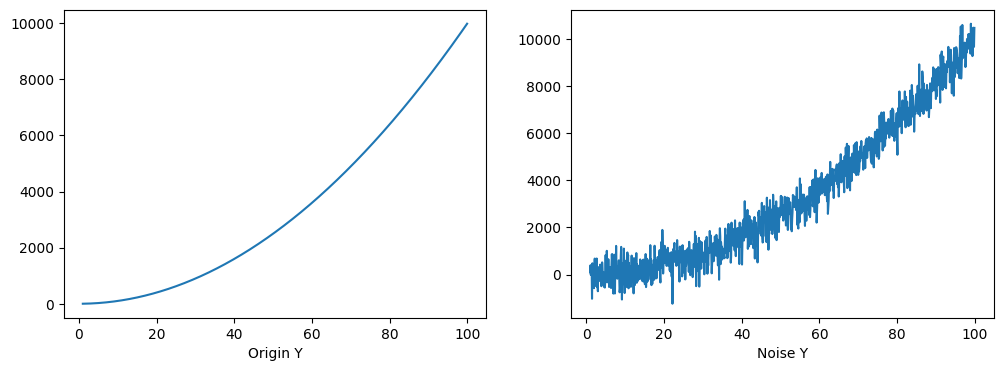

In [12]:
import numpy as np

mu, sigma = 0, 500
x = np.arange(1, 100, 0.1)
noise = np.random.normal(mu, sigma, len(x))
origin_y = x ** 2
noise_y = x ** 2 + noise

fig = plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.xlabel('Origin Y')
plt.plot(x, origin_y)

plt.subplot(1,2,2)
plt.xlabel('Noise Y')
plt.plot(x, noise_y)

plt.show()

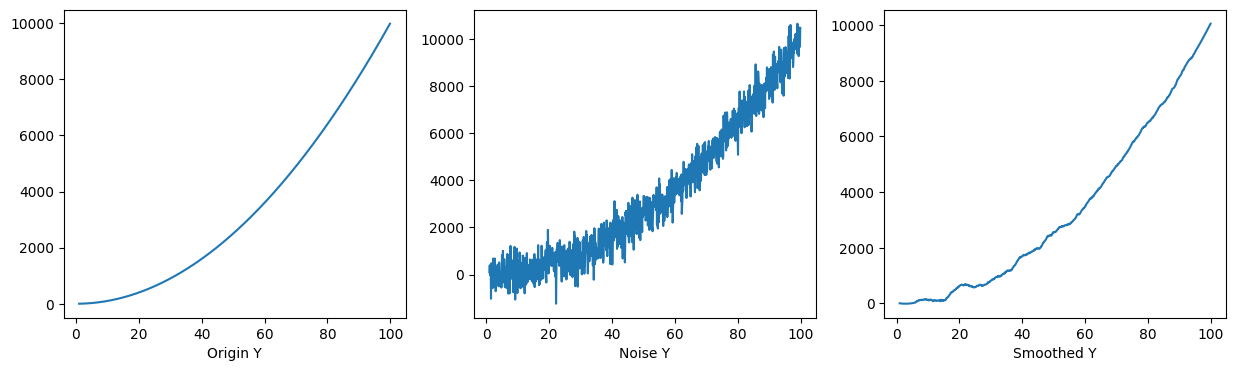

In [13]:
from scipy.signal import savgol_filter
smooth_y = savgol_filter(noise_y, 101, 2)

fig = plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
plt.xlabel('Origin Y')
plt.plot(x, origin_y)

plt.subplot(1,3,2)
plt.xlabel('Noise Y')
plt.plot(x, noise_y)

plt.subplot(1,3,3)
plt.xlabel('Smoothed Y')
plt.plot(x, smooth_y)

## Data Reduction
### PCA

In [14]:
#主要維度有92%的可信度
#副維度則有6%
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(iris.iloc[:, 0:3])
New_Iris = pca.transform(iris.iloc[:, 0:3])

print(pca.explained_variance_ratio_)

[0.92464061 0.06046599]


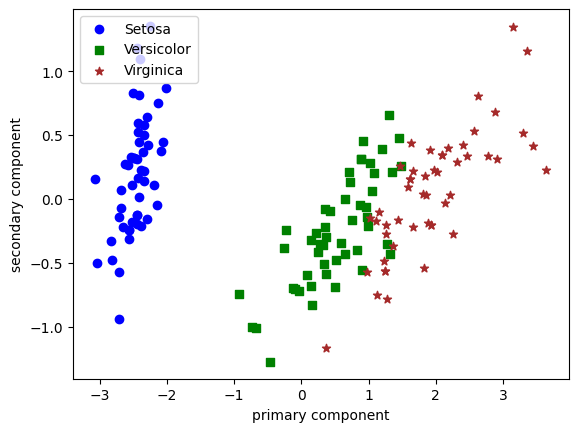

In [15]:
New_Iris = pd.DataFrame(New_Iris, columns = ['primary component', 'secondary component'])
new_Iris = pd.concat([New_Iris, iris['label']], axis = 1)

X = new_Iris.values
 
plt.scatter(X[:50, 0], X[:50, 1],
            color='blue', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='green', marker='s', label='Versicolor')
plt.scatter(X[100:, 0], X[100:, 1],
            color='brown', marker='*', label='Virginica')
 
plt.xlabel('primary component')
plt.ylabel('secondary component')
plt.legend(loc='upper left')

plt.show()